In [5]:
import pandas as pd
import random
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image, ImageOps
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
from sklearn.datasets import fetch_openml
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [6]:
import os 

PATH = '/content/drive/MyDrive/Dataset'

classes = os.listdir(PATH)
classes

['bolsa']

In [7]:
import json

ruta_archivo = '/content/basura_labels.json'

with open(ruta_archivo, 'r') as archivo:
    etiquetas = json.load(archivo)
etiquetas

[{'annotation': {'filename': '0493.jpg',
   'size': {'width': '800', 'height': '600', 'depth': '3'},
   'object': [{'name': 'bolsa',
     'bndbox': {'top': 199.0,
      'left': 359.0,
      'height': 202.0,
      'width': 213.0}}]}},
 {'annotation': {'filename': '0494.jpg',
   'size': {'width': '800', 'height': '600', 'depth': '3'},
   'object': [{'name': 'bolsa',
     'bndbox': {'top': 152.0,
      'left': 385.0,
      'height': 242.0,
      'width': 239.0}}]}},
 {'annotation': {'filename': '0495.jpg',
   'size': {'width': '800', 'height': '600', 'depth': '3'},
   'object': [{'name': 'bolsa',
     'bndbox': {'top': 102.0,
      'left': 367.0,
      'height': 341.0,
      'width': 302.0}}]}},
 {'annotation': {'filename': '0496.jpg',
   'size': {'width': '800', 'height': '600', 'depth': '3'},
   'object': [{'name': 'bolsa',
     'bndbox': {'top': 164.0,
      'left': 376.0,
      'height': 254.0,
      'width': 209.0}}]}},
 {'annotation': {'filename': '0497.jpg',
   'size': {'width': '8

In [8]:
imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  for img in etiquetas:
    annotation = img['annotation']['filename']
    imgs.append(f"{PATH}/{lab}/{annotation}")
  labels += [i]*len(paths)

Categoría: bolsa. Imágenes: 1008


In [9]:
print(imgs[3], etiquetas[3]['annotation'])

/content/drive/MyDrive/Dataset/bolsa/0496.jpg {'filename': '0496.jpg', 'size': {'width': '800', 'height': '600', 'depth': '3'}, 'object': [{'name': 'bolsa', 'bndbox': {'top': 164.0, 'left': 376.0, 'height': 254.0, 'width': 209.0}}]}


In [10]:
print(etiquetas[3]['annotation'])

{'filename': '0496.jpg', 'size': {'width': '800', 'height': '600', 'depth': '3'}, 'object': [{'name': 'bolsa', 'bndbox': {'top': 164.0, 'left': 376.0, 'height': 254.0, 'width': 209.0}}]}


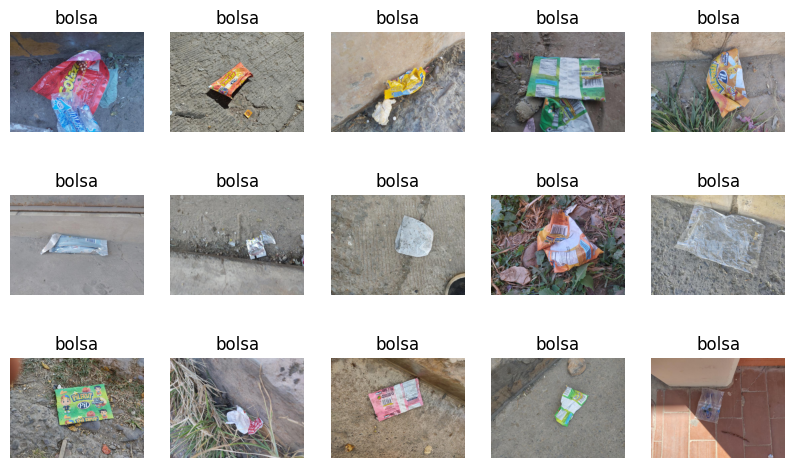

In [11]:
import random 
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, etiquetas, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(806, 202)

In [13]:
print(train_imgs)

['/content/drive/MyDrive/Dataset/bolsa/0997.jpg', '/content/drive/MyDrive/Dataset/bolsa/0139.jpg', '/content/drive/MyDrive/Dataset/bolsa/0607.jpg', '/content/drive/MyDrive/Dataset/bolsa/0445.jpg', '/content/drive/MyDrive/Dataset/bolsa/0986.jpg', '/content/drive/MyDrive/Dataset/bolsa/0137.jpg', '/content/drive/MyDrive/Dataset/bolsa/0482.jpg', '/content/drive/MyDrive/Dataset/bolsa/0013.jpg', '/content/drive/MyDrive/Dataset/bolsa/0274.jpg', '/content/drive/MyDrive/Dataset/bolsa/0820.jpg', '/content/drive/MyDrive/Dataset/bolsa/0373.jpg', '/content/drive/MyDrive/Dataset/bolsa/0052.jpg', '/content/drive/MyDrive/Dataset/bolsa/0226.jpg', '/content/drive/MyDrive/Dataset/bolsa/0714.jpg', '/content/drive/MyDrive/Dataset/bolsa/0762.jpg', '/content/drive/MyDrive/Dataset/bolsa/0731.jpg', '/content/drive/MyDrive/Dataset/bolsa/0947.jpg', '/content/drive/MyDrive/Dataset/bolsa/0546.jpg', '/content/drive/MyDrive/Dataset/bolsa/0458.jpg', '/content/drive/MyDrive/Dataset/bolsa/0526.jpg', '/content/drive/MyD

In [14]:
print(train_labels)

[{'annotation': {'filename': '0997.jpg', 'size': {'width': '800', 'height': '600', 'depth': '3'}, 'object': [{'name': 'bolsa', 'bndbox': {'top': 330.0, 'left': 442.0, 'height': 114.0, 'width': 132.0}}]}}, {'annotation': {'filename': '0139.jpg', 'size': {'width': '800', 'height': '600', 'depth': '3'}, 'object': [{'name': 'bolsa', 'bndbox': {'top': 198.0, 'left': 331.0, 'height': 220.0, 'width': 163.0}}]}}, {'annotation': {'filename': '0607.jpg', 'size': {'width': '800', 'height': '600', 'depth': '3'}, 'object': [{'name': 'bolsa', 'bndbox': {'top': 112.0, 'left': 166.0, 'height': 245.0, 'width': 486.0}}]}}, {'annotation': {'filename': '0445.jpg', 'size': {'width': '800', 'height': '600', 'depth': '3'}, 'object': [{'name': 'bolsa', 'bndbox': {'top': 230.0, 'left': 243.0, 'height': 252.0, 'width': 264.0}}]}}, {'annotation': {'filename': '0986.jpg', 'size': {'width': '800', 'height': '600', 'depth': '3'}, 'object': [{'name': 'bolsa', 'bndbox': {'top': 47.0, 'left': 145.0, 'height': 411.0, '

In [15]:
import torch
from skimage import io
from skimage import color
device = "cuda" if torch.cuda.is_available() else "cpu"

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, device):
    self.X = X
    self.y = y
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    if img.shape[2] == 4:
      img = color.rgba2rgb(img)
    # aplicar transformaciones
    #print(f"imagen: {img}")
    return torch.from_numpy(img/255.).float(), self.y[ix]

In [16]:
import albumentations as A

# trans = A.Compose([
#     A.Resize(800, 600)
# ])

dataset = {
    'train': Dataset(train_imgs, train_labels, device), 
    'test': Dataset(test_imgs, test_labels, device)
}

len(dataset['train']), len(dataset['test'])

(806, 202)

In [17]:
dataset['train'][0]

(tensor([[[0.6863, 0.6157, 0.5608],
          [0.6863, 0.6157, 0.5608],
          [0.6902, 0.6196, 0.5647],
          ...,
          [0.4863, 0.4549, 0.4431],
          [0.4863, 0.4549, 0.4431],
          [0.4824, 0.4510, 0.4392]],
 
         [[0.6863, 0.6157, 0.5608],
          [0.6863, 0.6157, 0.5608],
          [0.6863, 0.6157, 0.5608],
          ...,
          [0.4784, 0.4471, 0.4353],
          [0.4784, 0.4471, 0.4353],
          [0.4745, 0.4431, 0.4314]],
 
         [[0.6824, 0.6118, 0.5569],
          [0.6824, 0.6118, 0.5569],
          [0.6824, 0.6118, 0.5569],
          ...,
          [0.4667, 0.4353, 0.4235],
          [0.4667, 0.4353, 0.4235],
          [0.4627, 0.4314, 0.4196]],
 
         ...,
 
         [[0.6706, 0.5922, 0.6000],
          [0.6706, 0.5922, 0.6000],
          [0.6667, 0.5882, 0.5961],
          ...,
          [0.4784, 0.4471, 0.4353],
          [0.4863, 0.4549, 0.4431],
          [0.4863, 0.4549, 0.4431]],
 
         [[0.6667, 0.5882, 0.5961],
          [0

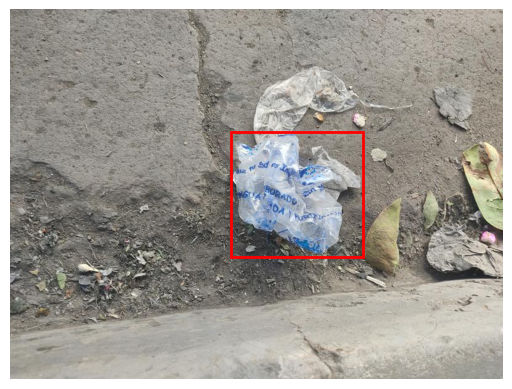

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Obtener la ruta de la imagen y las etiquetas
image_path = imgs[0]
labels = etiquetas[0]

# Cargar la imagen
image = Image.open(image_path)

# Crear una figura y un objeto de eje
fig, ax = plt.subplots()

# Mostrar la imagen en el eje
ax.imshow(image)
ax.axis('off')

# Obtener las coordenadas del cuadro delimitador
bndboxes = labels['annotation']['object']
for bndbox in bndboxes:
    # Obtener las coordenadas del cuadro delimitador
    x = int(bndbox['bndbox']['left'])
    y = int(bndbox['bndbox']['top'])
    width = int(bndbox['bndbox']['width'])
    height = int(bndbox['bndbox']['height'])

    # Crear un rectángulo y agregarlo al eje
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Mostrar la imagen y los rectángulos en pantalla
plt.show()

In [19]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.patheffects as PathEffects
# import random

# def get_sample(ix):
#   img, label = dataset['train'][ix]
#   img_np = np.array(img)
#   anns = label['annotation']['object']
#   if type(anns) is not list:
#     anns = [anns]
#   labels = np.array([classes.index(ann['name']) for ann in anns])
#   bbs = [ann['bndbox'] for ann in anns]
#   bbs = np.array([[int(bb['left']), int(bb['top']),int(bb['width']),int(bb['height'])] for bb in bbs])
#   anns = (labels, bbs)
#   return img_np, anns

# def plot_anns(img, anns, ax=None, bg=-1):
#   # anns is a tuple with (labels, bbs)
#   # bbs is an array of bounding boxes in format [x_min, y_min, x_max, y_max] 
#   # labels is an array containing the label 
#   if not ax:
#     fig, ax = plt.subplots(figsize=(10, 6))
#   ax.imshow(img)
#   labels, bbs = anns
#   for lab, bb in zip(labels, bbs):
#     if bg == -1 or lab != bg:
#       x, y, xm, ym = bb
#       w, h = xm - x, ym - y
#       rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
#       text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
#       text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
#       ax.add_patch(rect)

In [20]:
# r, c = 3, 4
# fig = plt.figure(figsize=(4*c, 4*r))
# for _r in range(r):
#     for _c in range(c):
#         ax = plt.subplot(r, c, _r*c + _c + 1)
#         ix = random.randint(0, len(dataset['train'])-1)
#         ax.set_title(ix)
#         img_np, anns = get_sample(ix)
#         plot_anns(img_np, anns, ax)
#         plt.axis("off")
# plt.tight_layout()
# plt.show()

In [21]:
classes = ["background","bolsa"]

In [22]:
dataset['train'][596]

(tensor([[[0.3765, 0.3569, 0.3804],
          [0.3647, 0.3451, 0.3686],
          [0.3412, 0.3333, 0.3529],
          ...,
          [0.3961, 0.4118, 0.4157],
          [0.4118, 0.4275, 0.4314],
          [0.4196, 0.4353, 0.4392]],
 
         [[0.3686, 0.3490, 0.3725],
          [0.3647, 0.3451, 0.3686],
          [0.3451, 0.3373, 0.3569],
          ...,
          [0.3765, 0.3922, 0.3961],
          [0.3922, 0.4078, 0.4118],
          [0.4000, 0.4157, 0.4196]],
 
         [[0.3725, 0.3529, 0.3765],
          [0.3725, 0.3529, 0.3765],
          [0.3608, 0.3529, 0.3725],
          ...,
          [0.3451, 0.3647, 0.3765],
          [0.3608, 0.3804, 0.3922],
          [0.3725, 0.3922, 0.4039]],
 
         ...,
 
         [[0.4431, 0.4667, 0.5137],
          [0.4471, 0.4706, 0.5176],
          [0.4510, 0.4745, 0.5216],
          ...,
          [0.5059, 0.4902, 0.4863],
          [0.4941, 0.4784, 0.4745],
          [0.4863, 0.4706, 0.4667]],
 
         [[0.4510, 0.4745, 0.5216],
          [0

In [23]:
def convert_to_xmin_xmax_ymin_ymax(top, left, height, width):
    xmin = left
    xmax = left + width
    ymin = top
    ymax = top + height
    return xmin, xmax, ymin, ymax

In [24]:
# import matplotlib.patches as mpatches
# import matplotlib.patheffects as PathEffects

# def plot():
#   bg=-1
#   ax=None
#   img, label = dataset['train'][500]
#   img_np = np.array(img)
#   anns = label['annotation']['object']
#   if type(anns) is not list:
#     anns = [anns]
#   labels = np.array([classes.index(ann['name']) for ann in anns])
#   bbs = [ann['bndbox'] for ann in anns]
#   # xmin, xmax, ymin, ymax = convert_to_xmin_xmax_ymin_ymax(top, left, height, width)
#   # bbs = np.array([[int(bb['top']), int(bb['left']),int(bb['height']),int(bb['width'])] for bb in bbs])
#   xmin, xmax, ymin, ymax = convert_to_xmin_xmax_ymin_ymax(int(bb['top']), int(bb['left']),int(bb['height']),int(bb['width']))
#   bbs = np.array([[xmin, ymin, xmax, ymax] for bb in bbs])
#   anns = (labels, bbs)
#   if not ax:
#       fig, ax = plt.subplots(figsize=(10, 6))
#   img_np, anns
#   ax.imshow(img_np)
#   labels, bbs = anns
#   for lab, bb in zip(labels, bbs):
#       if bg == -1 or lab != bg:
#         x, y, w, h = bb
#         rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
#         text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
#         text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
#         ax.add_patch(rect)

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.patheffects as PathEffects
# import random

# def get_sample(ix):
#   img_np, label = dataset['train'][ix]
  
#   #img_np = np.array(img)
#   anns = label['annotation']['object']
#   if type(anns) is not list:
#     anns = [anns]
#   labels = np.array([classes.index(ann['name']) for ann in anns])
#   for ann in anns:
#       bb = ann['bndbox']
#       xmin, xmax, ymin, ymax = convert_to_xmin_xmax_ymin_ymax(int(bb['top']), int(bb['left']), int(bb['height']), int(bb['width']))
#       bbs.append([xmin, ymin, xmax, ymax])
  
#   anns = (labels, bbs)
#   return img_np, anns

In [26]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import matplotlib.patheffects as PathEffects

# def plot_anns(img, anns, ax=None, bg=-1):
#   if not ax:
#     fig, ax = plt.subplots(figsize=(10, 6))
#   ax.imshow(img)
#   labels, bbs = anns
#   for lab, bb in zip(labels, bbs):
#     if bg == -1 or lab != bg:
#       x, y, xm, ym = bb
#       w, h = xm - x, ym - y
#       rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
#       text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
#       text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
#       ax.add_patch(rect)

In [27]:
def get_sample(ix):
  img_np, label = dataset['train'][ix]
  
  #img_np = np.array(img)
  anns = label['annotation']['object']
  if type(anns) is not list:
    anns = [anns]
  labels = np.array([classes.index(ann['name']) for ann in anns])
  bbs = []
  for ann in anns:
      bb = ann['bndbox']
      xmin, xmax, ymin, ymax = convert_to_xmin_xmax_ymin_ymax(int(bb['top']), int(bb['left']), int(bb['height']), int(bb['width']))
      bbs.append([xmin, ymin, xmax, ymax])

  bbs = np.array(bbs)
  
  anns = (labels, bbs)
  
  return img_np, anns

In [28]:
def plot_anns(img, anns, ax=None, bg=-1):
  # anns is a tuple with (labels, bbs)
  # bbs is an array of bounding boxes in format [x_min, y_min, x_max, y_max] 
  # labels is an array containing the label 
  if not ax:
    fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(img)
  labels, bbs = anns
  for lab, bb in zip(labels, bbs):
    if bg == -1 or lab != bg:
      x, y, xm, ym = bb
      w, h = xm - x, ym - y
      rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
      text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
      text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
      ax.add_patch(rect)

(tensor([[[0.6039, 0.6902, 0.6078],
          [0.6118, 0.7020, 0.6392],
          [0.6235, 0.7137, 0.6824],
          ...,
          [0.8078, 0.7686, 0.7725],
          [0.8000, 0.7608, 0.7647],
          [0.7961, 0.7569, 0.7608]],
 
         [[0.6196, 0.7137, 0.6275],
          [0.6353, 0.7255, 0.6627],
          [0.6471, 0.7373, 0.7059],
          ...,
          [0.7882, 0.7490, 0.7529],
          [0.7804, 0.7412, 0.7451],
          [0.7765, 0.7373, 0.7412]],
 
         [[0.6235, 0.7216, 0.6353],
          [0.6431, 0.7373, 0.6745],
          [0.6588, 0.7569, 0.7333],
          ...,
          [0.7686, 0.7216, 0.7216],
          [0.7608, 0.7137, 0.7137],
          [0.7569, 0.7098, 0.7098]],
 
         ...,
 
         [[0.6824, 0.6784, 0.3569],
          [0.6941, 0.6902, 0.3647],
          [0.7098, 0.7098, 0.3725],
          ...,
          [0.4000, 0.3961, 0.3804],
          [0.3843, 0.3804, 0.3725],
          [0.3216, 0.3176, 0.3098]],
 
         [[0.6784, 0.6784, 0.3412],
          [0

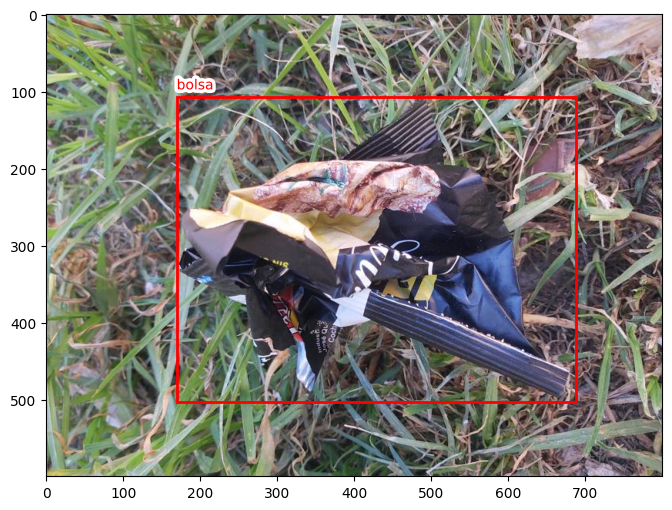

In [29]:
ix = random.randint(0,1035)
ix=60
image, anns = get_sample(ix)
plot_anns(image, anns)
image, anns

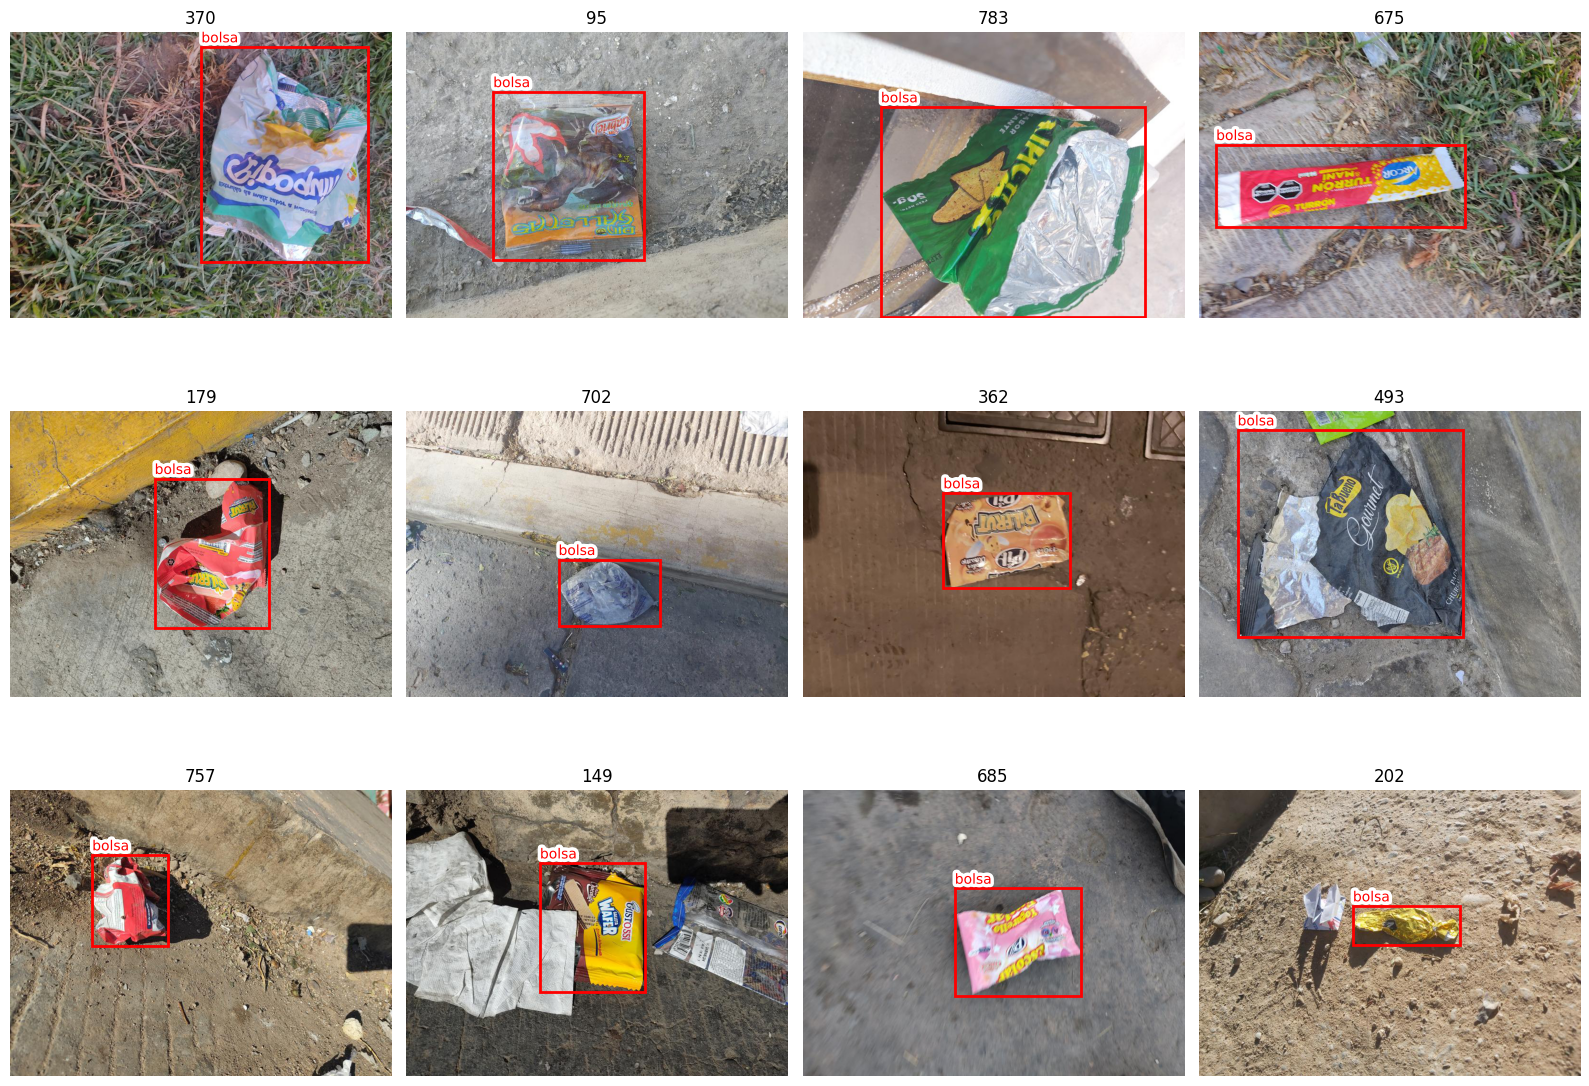

In [30]:
r, c = 3, 4
fig = plt.figure(figsize=(4*c, 4*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['train'])-1)
        ax.set_title(ix)
        img_np, anns = get_sample(ix)
        plot_anns(img_np, anns, ax)
        plt.axis("off")
plt.tight_layout()
plt.show()

In [31]:
classes = ["background","bolsa"]

In [32]:
def norm(bb, shape):
  # normalize bb
  # shape = (heigh, width)
  # bb = [x_min, y_min, x_max, y_max]
  h, w = shape
  return np.array([bb[0]/w, bb[1]/h, bb[2]/w, bb[3]/h])

def unnorm(bb, shape):
  # unnormalize bb
  # shape = (heigh, width)
  # bb = [x_min, y_min, x_max, y_max]
  h, w = shape
  return np.array([bb[0]*w, bb[1]*h, bb[2]*w, bb[3]*h])

def xyxy2xywh(bb):
  return torch.stack([bb[:,0], bb[:,1], bb[:,2]-bb[:,0], bb[:,3]-bb[:,1]], axis=1)

#def xywh2xyxy(bb):
#  return torch.stack([bb[:,0], bb[:,1], bb[:,0]+bb[:,2], bb[:,1]+bb[:,3]], axis=1)

def generate_anchors(scales, centers, sizes):
    k, anchors, grid_size = [], [], []
    for s in scales:
        cnt = 0
        for (x, y) in centers:
            for (w, h) in sizes:
                for i in range(s):
                    for j in range(s):
                        # cwh
                        #anchors.append(np.array([x+i, y+j, w, h])/s)
                        # xyxy
                        anchors.append(np.array([x+i-w/2, y+j-h/2, x+i+w/2, y+j+h/2])/s)
                        grid_size.append(np.array([1./s,1./s]))
                cnt = cnt + 1
        k.append(cnt)
    return k, torch.tensor(anchors).float(), torch.tensor(grid_size).float()

In [33]:
def plot_anchors(img, anns, anchors, ax=None, overlap=False):
  # anns is a tuple with (bbs, labels)
  # bbs is an array of bounding boxes in format [x_min, y_min, x_max, y_max] 
  # labels is an array containing the label 
  if not ax:
    fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(img)
  labels, bbs = anns

  anchors = xyxy2xywh(anchors)
  _anchors = np.array([unnorm(a, img.shape[:2]) for a in anchors])
  for a in _anchors:
    x, y, w, h = a
    rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='green', linewidth=2)
    ax.add_patch(rect)

  labels, bbs = anns
  for lab, bb in zip(labels, bbs):
    x, y, xm, ym = bb
    w, h = xm - x, ym - y
    rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
    text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
    text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    ax.add_patch(rect)

(array([1]), array([[246, 189, 502, 461]]))


<ipython-input-32-94038b129dcb>:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return k, torch.tensor(anchors).float(), torch.tensor(grid_size).float()


(138, [3, 3, 3])

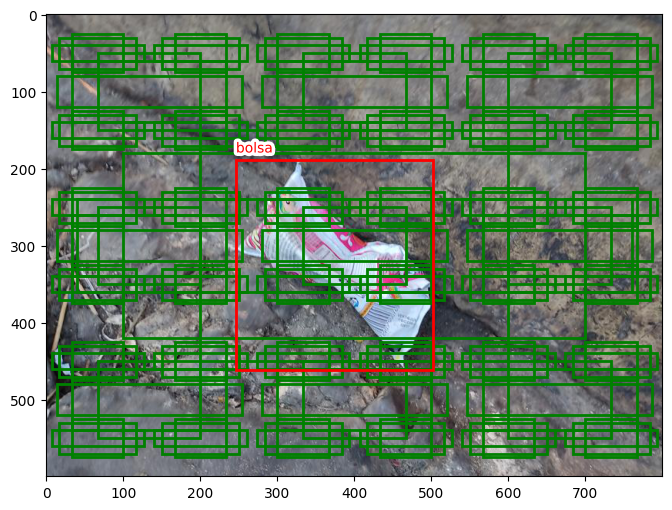

In [34]:
ix = 596
img_np, anns = get_sample(ix)
print(anns)
labels, bbs = anns

scales = [6, 3, 1]               
centers = [(0.5, 0.5)] 
size_scales = [0.5]
aspect_ratios = [(1., 1.), (1.5, 0.8), (1.8, 0.4)]
sizes = [(s*a[0], s*a[1]) for s in size_scales for a in aspect_ratios]
k, anchors, grid_size = generate_anchors(scales, centers, sizes)

plot_anchors(img_np, anns, anchors)
len(anchors), k

In [35]:
!pip install fvcore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import torch
# get list of models
torch.hub.list('zhanghang1989/ResNeSt', force_reload=True)
# load pretrained models, using ResNeSt-50 as an example
model = torch.hub.load('zhanghang1989/ResNeSt', 'resnest50', pretrained=True)

Downloading: "https://github.com/zhanghang1989/ResNeSt/zipball/master" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master


In [37]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): SplAtConv2d(
        (conv): Conv2d

In [48]:
def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.ReLU(),
        #torch.nn.BatchNorm2d(c_out),
        torch.nn.MaxPool2d(pk, stride=ps)
    )

def flatten_conv(x, k):
    return x.view(x.size(0), x.size(1)//k, -1).transpose(1,2)

class out_conv(torch.nn.Module):
    def __init__(self, c_in, k, n_classes):
        super().__init__()
        self.k = k
        self.oconv1 = torch.nn.Conv2d(c_in, k*4, 3, padding=1)
        self.oconv2 = torch.nn.Conv2d(c_in, k*n_classes, 3, padding=1)
    def forward(self, x):
        return [
            flatten_conv(self.oconv1(x), self.k),
            flatten_conv(self.oconv2(x), self.k)
        ]

def conv(c_i, c_o, stride=2, padding=1):
    return nn.Sequential(
        nn.Conv2d(c_i, c_o, 3, stride=stride, padding=padding), 
        nn.ReLU(),
        #nn.BatchNorm2d(c_o)
    )

# class SSD(torch.nn.Module):
#   def __init__(self, n_channels=3, n_classes=20, k=[1, 1, 1]):
#     super().__init__()
#     # backbone
#     # self.conv1 = block(n_channels, 8)
#     # self.conv2 = block(8, 16)
#     # self.conv3 = block(16, 32)
#     resnest = torch.hub.load('zhanghang1989/ResNeSt', 'resnest50', pretrained=True)
#     self.resnest = torch.nn.Sequential(*list(resnest.children())[:-1])

#     self.conv4 = block(32, 64)
#     self.conv5 = block(64, 64)
#     self.conv6 = block(64, 64)

#     # head
#     self.k = k
#     self.out4 = out_conv(64, self.k[0], n_classes)
#     self.out5 = out_conv(64, self.k[1], n_classes)
#     self.out6 = out_conv(64, self.k[2], n_classes)

#   def forward(self, x):
#     # backbone
#     # x = self.conv1(x)
#     # x = self.conv2(x)
#     # x = self.conv3(x) 
#     x = self.resnest(x)    # para inputs de 100x100
#     x4 = self.conv4(x)    # 6x6
#     x5 = self.conv5(x4)   # 3x3
#     x6 = self.conv6(x5)   # 1x1

#     # head
#     o1l, o1c = self.out4(x4)
#     o2l, o2c = self.out5(x5)
#     o3l, o3c = self.out6(x6)
#     return torch.cat([o1l,o2l,o3l],dim=1), torch.cat([o1c,o2c,o3c],dim=1)    
#     #return o2l, o2c

In [49]:
import torch
import torch.nn as nn
import resnest.torch as resnest

In [62]:
model = resnest.resnest50(pretrained=True)
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): SplAtConv2d(
        (conv): Conv2d

In [63]:
class SSD(nn.Module):
    def __init__(self, n_channels=3, n_classes=20, k=[1, 1, 1]):
        super().__init__()
        self.backbone = resnest.resnest50(pretrained=True)  # Utiliza el modelo ResNeSt-50 preentrenado
        self.k = k
        self.out4 = out_conv(2048, self.k[0], n_classes)  # Ajusta el número de canales de entrada para las capas de salida
        self.out5 = out_conv(2048, self.k[1], n_classes)
        self.out6 = out_conv(2048, self.k[2], n_classes)

    def forward(self, x):
        x = self.backbone.conv1(x)
            
        x = self.backbone.bn1(x)
        x = self.backbone.relu(x)
        x = self.backbone.maxpool(x)

        x = self.backbone.layer1(x)
        print("Layer1: ", x.shape)
        x = self.backbone.layer2(x)
        print("Layer2: ", x.shape)
        x = self.backbone.layer3(x)
        print("Layer3: ", x.shape)
        x = self.backbone.layer4(x)
        print("Layer4: ", x.shape)

        o1l, o1c = self.out4(x)
        o2l, o2c = self.out5(x)
        o3l, o3c = self.out6(x)
        return torch.cat([o1l, o2l, o3l], dim=1), torch.cat([o1c, o2c, o3c], dim=1)

In [64]:
net = SSD(n_classes=len(classes), k=k)
net
output = net(torch.rand((64,3,100,100)))
output[0].shape, output[1].shape

Layer1:  torch.Size([64, 256, 25, 25])
Layer2:  torch.Size([64, 512, 13, 13])
Layer3:  torch.Size([64, 1024, 7, 7])
Layer4:  torch.Size([64, 2048, 4, 4])


(torch.Size([64, 144, 4]), torch.Size([64, 144, 2]))

In [52]:
def actn_to_bb(actn, anchors, grid_size):
    actn_bbs = torch.tanh(actn)
    actn_p1 = anchors[:,:2] + actn_bbs[:,:2]*grid_size*0.5
    actn_p2 = anchors[:,2:] + actn_bbs[:,2:]*grid_size*0.5
    return torch.cat([actn_p1, actn_p2], dim=1)

In [53]:
def map_to_ground_truth(overlaps):
    prior_overlap, prior_idx = overlaps.max(1)
    gt_overlap, gt_idx = overlaps.max(0)
    gt_overlap[prior_idx] = 1.99
    for i,o in enumerate(prior_idx): gt_idx[o] = i
    return gt_overlap, gt_idx

In [54]:
class SSDLoss(torch.nn.Module):
    def __init__(self, anchors, grid_size, threshold=0.4):
        super().__init__()
        self.loc_loss = torch.nn.L1Loss()
        self.class_loss = torch.nn.CrossEntropyLoss()
        self.anchors = anchors.to(device)
        self.grid_size = grid_size.to(device)
        self.threshold = threshold

    def forward(self, preds, target):
        pred_bbs, pred_cs = preds 
        tar_bbs, c_t = target # B x O x 4, B x O
        # cada imagen del batch puede tener un número diferente de detecciones
        loc_loss, clas_loss = 0, 0
        for pred_bb, pred_c, tar_bb, tar_c in zip(pred_bbs, pred_cs, tar_bbs, c_t):
            labels = torch.zeros(len(self.anchors)).long().to(device) # por defecto todas las etiquetas son `background`
            if tar_bb.shape[0] is not 0: # es posible que haya imágenes sin detecciones
                # calculamos el IoU de las detecciones con las cajas
                overlaps = torchvision.ops.box_iou(tar_bb, self.anchors)
                # nos quedamos con aquellas que coincidan
                gt_overlap, gt_idx = map_to_ground_truth(overlaps)
                pos = gt_overlap > self.threshold
                # optimizamos para aquellas cajas que superen el filtro
                pos_idx = torch.nonzero(pos)[:,0]
                tar_idx = gt_idx[pos_idx]
                pred_bb = actn_to_bb(pred_bb, self.anchors, self.grid_size)
                _anchors = pred_bb[pos_idx]
                tar_bb = tar_bb[tar_idx]
                loc_loss += self.loc_loss(_anchors, tar_bb)
                labels[pos_idx] = tar_c[tar_idx]
                clas_loss += self.class_loss(pred_c, labels)
        return clas_loss + loc_loss

<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-54-2541eadb832f>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if tar_bb.shape[0] is not 0: # es posible que haya imágenes sin detecciones


In [55]:
def fit(model, X, target, epochs=1, lr=3e-4):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = SSDLoss(anchors, grid_size)
    for epoch in range(1, epochs+1):
        model.train()
        train_loss_loc, train_loss_cls = [], []
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        train_loss_loc.append(loss.item())
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss_loc):.5f}")

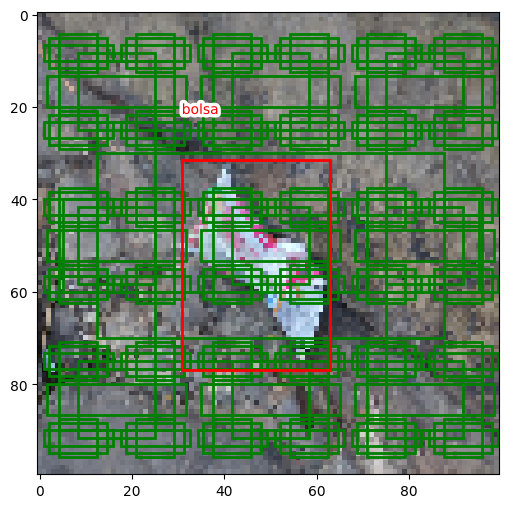

In [56]:
import albumentations as A

trans = A.Compose([
    A.Resize(100, 100)
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

labels, bbs = anns
img_np = np.array(img_np)
augmented = trans(**{'image': img_np, 'bboxes': bbs, 'labels': labels})

img, bbs, labels = augmented['image'], augmented['bboxes'], augmented['labels']

plot_anchors(img, (labels, bbs), anchors)
plt.show()

In [57]:
img_tensor = torch.FloatTensor(img / 255.).permute(2,0,1).unsqueeze(0).to(device)
bb_norm = [norm(bb, img.shape[:2]) for bb in bbs]
bb_tensor = torch.FloatTensor(bb_norm).unsqueeze(0).to(device)
label_tensor = torch.tensor(labels).long().unsqueeze(0).to(device)

img_tensor.shape, bb_tensor.shape, label_tensor.shape

(torch.Size([1, 3, 100, 100]), torch.Size([1, 1, 4]), torch.Size([1, 1]))

In [66]:
model = SSD(n_classes = len(classes), k=k)
model

SSD(
  (backbone): ResNet(
    (conv1): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [67]:
fit(model, img_tensor, (bb_tensor, label_tensor), epochs=100)

ValueError: ignored

In [ ]:
def predict(model, X):
    model.eval()
    with torch.no_grad():
        X = X.to(device)
        bbs, labels = model(X)
        bbs = actn_to_bb(bbs[0].cpu(), anchors, grid_size)
    return bbs, torch.max(torch.softmax(labels.cpu(), axis=2)[0], axis=1)

In [ ]:
bbs, (scores, labels) = predict(model, img_tensor)
bbs = [unnorm(bb, img.shape[:2]) for bb in bbs]

In [ ]:
plot_anns(img, (labels, bbs))
plt.show()

In [ ]:
plot_anns(img, (labels, bbs), bg=0)
plt.show()

In [ ]:
bbs, (scores, labels) = predict(model, img_tensor)
# quitar bg
bbs, labels, scores = bbs[labels > 0], labels[labels > 0], scores[labels > 0]
bbs, labels, scores

In [ ]:
nms_ixs = torchvision.ops.nms(bbs, scores, iou_threshold=0.8)
nms_ixs

In [ ]:
bbs, labels = bbs[nms_ixs], labels[nms_ixs]
bbs = [unnorm(bb, img.shape[:2]) for bb in bbs]
plot_anns(img, (labels, bbs))
plt.show()